In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([
    [3.8915, 4.2105], [3.6898, 6.6051], [2.7763, 7.5057], [3.1137, 5.7724],
    [2.9251, 5.4315], [3.6699, 6.4406], [2.8404, 3.8136], [3.7729, 5.2398],
    [2.6465, 3.4946], [4.0902, 5.9298], [3.3337, 5.5294], [1.44, 5.8302],
    [3.6919, 5.0708], [4.4506, 3.629], [4.7716, 6.4982], [3.7306, 4.8439],
    [4.9867, 5.6805], [4.1954, 6.455], [5.6164, 6.0755], [3.7672, 4.6705],
    [3.982, 5.2395], [3.9381, 5.2835], [4.0603, 6.4953], [4.3357, 6.7917],
    [4.5707, 4.4346], [2.5098, 4.4806], [2.2003, 5.6314], [4.8419, 5.4988],
    [4.4708, 5.7022], [2.6502, 4.4475], [3.4506, 4.1548], [5.3572, 5.4207],
    [2.3391, 6.7416], [3.8305, 6.1357], [2.1096, 5.3812], [3.674, 5.1154],
    [3.8091, 4.3737], [3.3172, 6.4038], [4.4469, 6.3588], [3.3633, 5.3338],
    [4.6922, 5.8894], [4.6014, 5.774], [3.2233, 6.4315], [3.7617, 7.1484],
    [3.7115, 3.7335], [4.4714, 5.1916], [4.7502, 5.4191], [4.2977, 4.2184],
    [3.5279, 5.2086], [2.6096, 6.3162], [4.7394, 2.6582], [3.3908, 3.4965],
    [4.4767, 2.9949], [5.7886, 1.6549], [4.735, 2.4475], [6.4513, 1.5372],
    [4.94, 5.1969], [5.7323, 3.7426], [4.9014, 4.1027], [6.1341, 3.7068],
    [3.8544, 4.6233], [7.1477, 5.0198], [5.2805, 3.0939], [5.3616, 2.5338],
    [4.0691, 4.6088], [5.4984, 5.7533], [5.4295, 3.2801], [4.2903, 2.7389],
    [6.0986, 3.8345], [7.5195, 2.5559], [6.6949, 2.7201], [5.4368, 4.1784],
    [6.0597, 3.28], [5.715, 4.0286], [5.922, 2.9962], [3.4284, 4.0874],
    [4.5904, 3.8441], [5.2147, 4.0196], [6.1363, 4.6772], [5.8662, 4.3752],
    [5.3976, 1.956], [3.3328, 5.3288], [4.0697, 2.2547], [6.8436, 1.732],
    [5.638, 4.4592], [5.5175, 2.7173], [5.1615, 1.6006], [8.4153, 3.4567],
    [4.8131, 5.3435], [5.3576, 4.3978], [6.0388, 4.195], [6.8282, 2.4295],
    [5.369, 2.6921], [6.4701, 4.4246], [6.4986, 4.8292], [5.7629, 4.6161],
    [4.1817, 4.0577], [6.3065, 2.4776], [5.6043, 3.3146], [7.0567, 4.7346]
])

y = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1
])

def normalize_features(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X = normalize_features(X)

# Add intercept term
m, n = X.shape
X = np.hstack((np.ones((m, 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    gradient = 1/m * np.dot(X.T, (h - y))
    return cost, gradient

def gradient_descent(X, y, learning_rate, num_iterations):
    theta = np.zeros(X.shape[1])
    costs = []
    for i in range(num_iterations):
        cost, gradient = cost_function(theta, X, y)
        theta -= learning_rate * gradient
        costs.append(cost)
    return theta, costs

# Train the model with a learning rate of 0.1
learning_rate = 0.1
num_iterations = 1000
theta, costs = gradient_descent(X, y, learning_rate, num_iterations)


### 1. Decision Boundary

In [19]:
print("Theta after convergence:", theta)
print("Final Cost:", costs[-1])

Theta after convergence: [ 0.32395465  2.38613663 -2.49462467]
Final Cost: 0.22910833189006333


### 2. Plot Cost vs Iterations

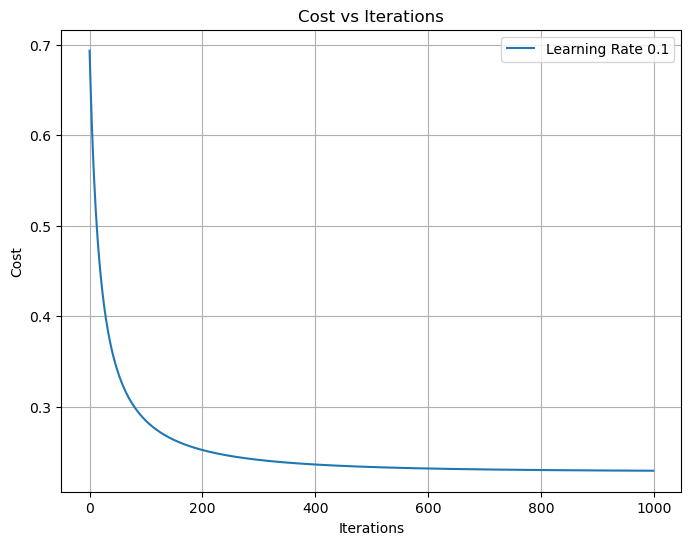

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(costs)), costs, label=f'Learning Rate {learning_rate}')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.legend()
plt.grid()
plt.show()

### 3. Plot Dataset and Decision Boundary

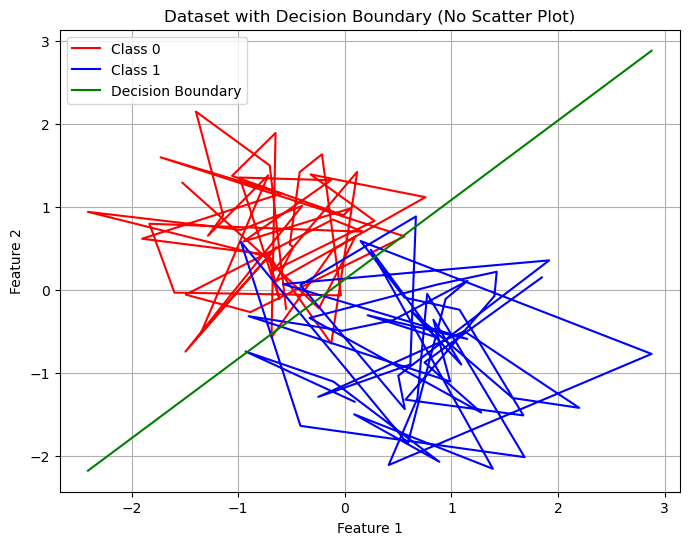

In [25]:
class_0 = X[y == 0]
class_1 = X[y == 1]

plt.figure(figsize=(8, 6))
plt.plot(class_0[:, 1], class_0[:, 2], 'r-', label='Class 0')
plt.plot(class_1[:, 1], class_1[:, 2], 'b-', label='Class 1')

# Decision boundary
x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.plot(x_values, y_values, 'g-', label='Decision Boundary')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset with Decision Boundary (No Scatter Plot)")
plt.legend()
plt.grid()
plt.show()

### 4. Compare Learning Rates

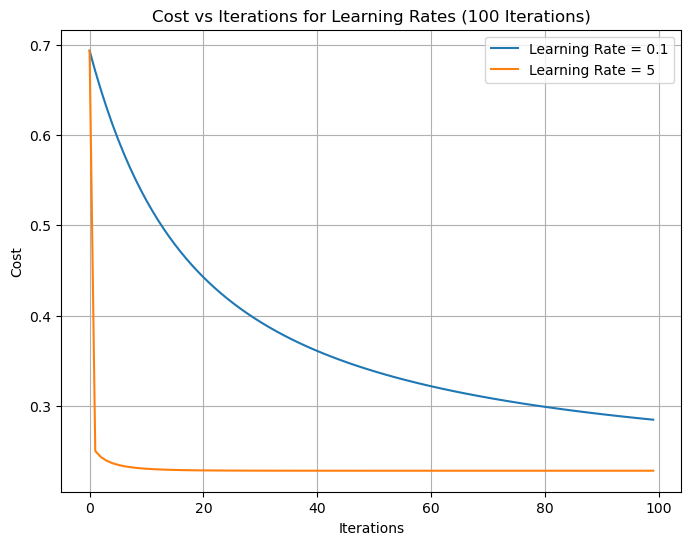

In [28]:
num_iterations = 100
theta_1, costs_1 = gradient_descent(X, y, 0.1, num_iterations)
theta_2, costs_2 = gradient_descent(X, y, 5, num_iterations)

plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), costs_1, label="Learning Rate = 0.1")
plt.plot(range(num_iterations), costs_2, label="Learning Rate = 5")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations for Learning Rates (100 Iterations)")
plt.legend()
plt.grid()
plt.show()


### 5. Confusion Matrix and Metrics

In [31]:
def predict(X, theta):
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

y_pred = predict(X, theta)

# Confusion Matrix
confusion_matrix = np.zeros((2, 2), int)
for actual, predicted in zip(y, y_pred):
    confusion_matrix[actual, predicted] += 1

print("Confusion Matrix:")
print(confusion_matrix)

# Accuracy, Precision, Recall, F1-Score
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
precision = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
recall = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

Confusion Matrix:
[[45  5]
 [ 8 42]]
Accuracy: 0.87
Precision: 0.89
Recall: 0.84
F1-Score: 0.87
